In [2]:
from dlc_practical_prologue import generate_pair_sets

nSamples = 1000
data = generate_pair_sets(nSamples)
var_names = ["train_input", "train_target", "train_classes", "test_input", "test_target", "test_classes"]
train_input, train_target, train_classes, test_input, test_target, test_classes = data
stringWidth = 20
for i, el in enumerate(list(map(lambda x: (x.shape, x.dtype), data))):
    print('{:s}  {:s}  {:s}'.format(
        var_names[i].ljust(stringWidth),
        ' x '.join(list(map(lambda x: str(x), list(el[0])))).center(stringWidth), 
        'dtype'.ljust(stringWidth)))

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./data/mnist/MNIST/raw




Extracting ./data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/mnist/MNIST/raw

Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!
train_input            1000 x 2 x 14 x 14   dtype               
train_target                  1000          dtype               
train_classes               1000 x 2        dtype               
test_input             1000 x 2 x 14 x 14   dtype               
test_target                   1000          dtype               
test_classes                1000 x 2        dtype               


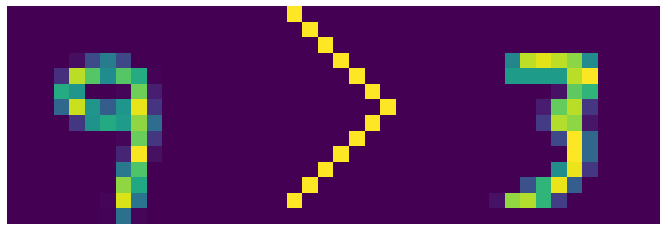

In [3]:
from utils import show_pair

show_pair(train_input, train_target, 0)

## Without using the information from the classes

In [4]:
from utils import train_model
from models.net1 import Net1
import torch
import torch.nn as nn

model = Net1(50)
criterion = nn.BCEWithLogitsLoss()
eta = 1e-3
mini_batch_size = 100
optimizer = torch.optim.Adam(model.parameters(), lr = eta)
nb_epochs = 10


        
train_model(model, train_input, train_target.float(), test_input, test_target, nb_epochs, mini_batch_size, optimizer, criterion)

Epoch 0: loss 9.317 / train accuracy 74.5%, test accuracy 75.5
Epoch 1: loss 4.873 / train accuracy 78.9%, test accuracy 78.0
Epoch 2: loss 4.170 / train accuracy 82.6%, test accuracy 78.0
Epoch 3: loss 3.820 / train accuracy 84.7%, test accuracy 81.2
Epoch 4: loss 3.156 / train accuracy 87.1%, test accuracy 81.2
Epoch 5: loss 2.783 / train accuracy 89.8%, test accuracy 83.3
Epoch 6: loss 2.465 / train accuracy 90.2%, test accuracy 83.2
Epoch 7: loss 2.307 / train accuracy 90.8%, test accuracy 84.0
Epoch 8: loss 2.193 / train accuracy 93.5%, test accuracy 83.4
Epoch 9: loss 1.794 / train accuracy 92.9%, test accuracy 82.7


In [5]:
nParams = sum(p.numel() for p in model.parameters() if p.requires_grad)
print('The model has {:d} trainable parameters'.format(nParams))

The model has 29789 trainable parameters


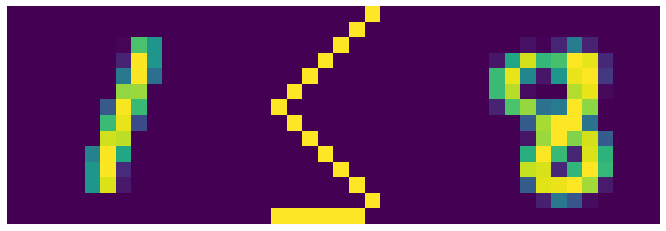

In [6]:
predictions = model(test_input)
show_pair(test_input, predictions, 10)

## With class information during training

In [7]:
from utils import train_model_double_objective
from models.net2 import Net2

model = Net2(50)
criterion = nn.BCEWithLogitsLoss()
criterion2 = nn.CrossEntropyLoss()
eta = 1e-3
mini_batch_size = 10
optimizer = torch.optim.Adam(model.parameters(), lr = eta)
nb_epochs = 10


        
train_model_double_objective(model, train_input, train_target.float(), 
                             train_classes, test_input, test_target, 
                             test_classes, nb_epochs, mini_batch_size, optimizer, 
                             criterion, criterion2, beta = 1)

Epoch 0: loss 388.714 / train accuracy 76.5%, test accuracy 75.1
Epoch 1: loss 171.221 / train accuracy 82.2%, test accuracy 79.6
Epoch 2: loss 125.192 / train accuracy 81.7%, test accuracy 82.3
Epoch 3: loss 97.210 / train accuracy 85.9%, test accuracy 82.2
Epoch 4: loss 75.177 / train accuracy 89.6%, test accuracy 85.8
Epoch 5: loss 67.333 / train accuracy 88.3%, test accuracy 86.3
Epoch 6: loss 64.845 / train accuracy 90.1%, test accuracy 85.8
Epoch 7: loss 51.033 / train accuracy 90.4%, test accuracy 86.8
Epoch 8: loss 49.694 / train accuracy 89.7%, test accuracy 86.0
Epoch 9: loss 42.973 / train accuracy 91.5%, test accuracy 87.4


In [8]:
def accuracy_of_digit_class(model, input_, classes, mini_batch_size = 10):
  nb_errors = 0
  for b in range(0, input_.size(0), mini_batch_size): 
    _, out1, _ = model(input_.narrow(0, b, mini_batch_size))
    _, pred = torch.max(out1, dim=1)
    gt = classes.narrow(0, b, mini_batch_size)[:, 0]
    nb_errors += (pred != gt).sum().item()
  N = input_.shape[0]
  return 100*(N-nb_errors)/N

In [9]:
print("Accuracy: {:.2f}".format(accuracy_of_digit_class(model, test_input, test_classes)))

Accuracy: 92.20
